# Python and R

In [42]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [44]:
%%R

# My commonly used R imports

require('tidyverse')
require('readr')



# Read the data



The cell below loads the data in python:

In [45]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
2277,4485,26841,1633,2004,2004_Sen-G_NV,NV,Sen-G,Sen-G,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,10/26/04,600.0,Harry Reid,3287,DEM,57.0,Richard Ziser,3288,REP,34.0,NaN,23.0,11/2/04,61.08,35.14,25.94,-2.94,1.0,NaN
6294,30409,36484,686,2012,2012_Pres-G_NV,NV,Pres-G,Pres-G,CallFire,42,IVR,NaN,10/24/12,909.0,Barack Obama,16,DEM,50.0,Mitt Romney,9,REP,46.0,NaN,4.0,11/6/12,52.36,45.68,6.68,-2.68,1.0,for Faith Horizon
3181,24866,89184,1351,2006,2006_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,11/3/06,1008.0,Ted Strickland,12740,DEM,59.0,J. Kenneth Blackwell,12738,REP,37.0,NaN,22.0,11/7/06,60.54,36.65,23.89,-1.89,1.0,NaN
5769,13721,17469,7443,2012,2012_Pres-R_IA,IA,Pres-P,Pres-R,Public Policy Polling,263,IVR,NaN,12/17/11,597.0,Rick Santorum,10,REP,10.0,Mitt Romney,9,REP,20.0,23.0,-10.0,1/3/12,24.56,24.53,0.03,NaN,0.0,NaN
6209,30336,36374,689,2012,2012_Pres-G_OK,OK,Pres-G,Pres-G,SoonerPoll.com,308,Live Phone,NaN,10/21/12,305.0,Barack Obama,16,DEM,32.7,Mitt Romney,9,REP,58.6,NaN,-25.9,11/6/12,33.23,66.77,-33.54,7.64,1.0,NaN


The cell below loads the same data in R:

In [46]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [47]:
%%R

# make df with Siena College and NYT Upshot

siena_df <- df %>% filter(pollster=='Siena College/The New York Times Upshot')

siena_df

# A tibble: 83 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   47325     74070      52  2016 2016… NC      Gov-G   Gov-G   Siena …     448
 2   47325     74050      62  2016 2016… NC      Sen-G   Sen-G   Siena …     448
 3   47325     74047     629  2016 2016… NC      Pres-G  Pres-G  Siena …     448
 4   47551     74389      86  2016 2016… PA      Sen-G   Sen-G   Siena …     448
 5   47551     74387     640  2016 2016… PA      Pres-G  Pres-G  Siena …     448
 6   47771     74777      93  2016 2016… FL      Sen-G   Sen-G   Siena …     448
 7   47771     74762     611  2016 2016… FL      Pres-G  Pres-G  Siena …     448
 8   48524     76188      52  2016 2016… NC      Gov-G   Gov-G   Siena …     448
 9   48524     76067      62  2016 2016… NC      Sen-G   Sen-G   Siena …     448
10   48524     76066     629  2016 2016… NC      Pres-G  Pres-G  Siena …     448
# … with

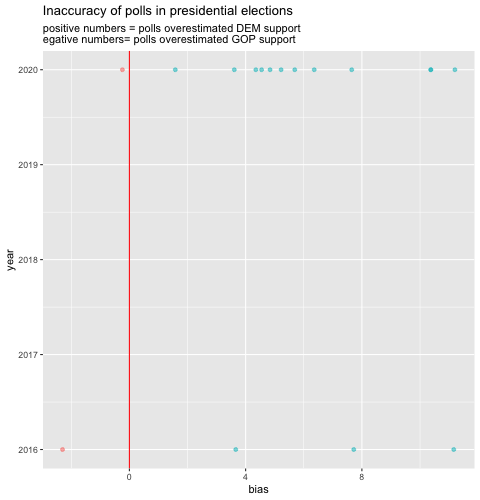

In [48]:
%%R -h 500

siena_df_pres_general <- siena_df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(siena_df_pres_general) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\negative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


 The Upshot's Presidential polls leaned further Democrat in 2020 and 2016

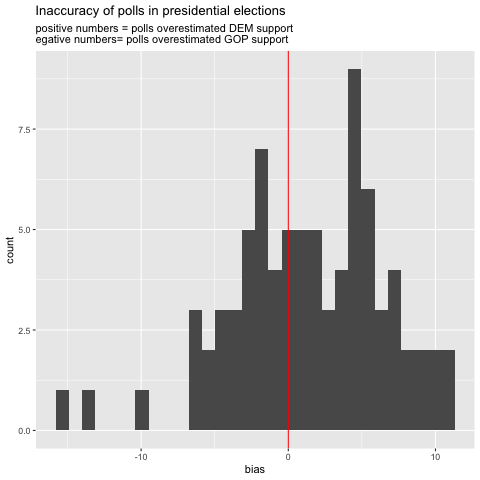

In [49]:
%%R
# a basic histogram
ggplot(siena_df) +
    aes(x=bias) +
    geom_histogram(bins=30) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\negative numbers= polls overestimated GOP support",
        )

In [50]:
%%R 

siena_df$bias  %>% summary()

# slight democrat bias

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.010  -2.075   1.515   1.423   5.125  11.200       1 


👉 **Jayhawk Consulting**

In [51]:
%%R

# make df with Jawhawk 

jayhawk_df <- df %>% filter(pollster=='Jayhawk Consulting Services')

jayhawk_df

# A tibble: 2 × 31
  poll_id question…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
    <dbl>      <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
1   36081      49015    5495  2014 2014… KS-1    House-G House-G Jayhaw…     157
2   56550      90986     330  2018 2018… KS-1    House-G House-G Jayhaw…     157
# … with 21 more variables: methodology <chr>, partisan <chr>, polldate <chr>,
#   samplesize <dbl>, cand1_name <chr>, cand1_id <dbl>, cand1_party <chr>,
#   cand1_pct <dbl>, cand2_name <chr>, cand2_id <dbl>, cand2_party <chr>,
#   cand2_pct <dbl>, cand3_pct <dbl>, margin_poll <dbl>, electiondate <chr>,
#   cand1_actual <dbl>, cand2_actual <dbl>, margin_actual <dbl>, bias <dbl>,
#   rightcall <dbl>, comment <chr>, and abbreviated variable names
#   ¹​question_id, ²​location, ³​type_simple, ⁴​type_detail, ⁵​pollster, …
# ℹ Use `colnames()` to see all variable names


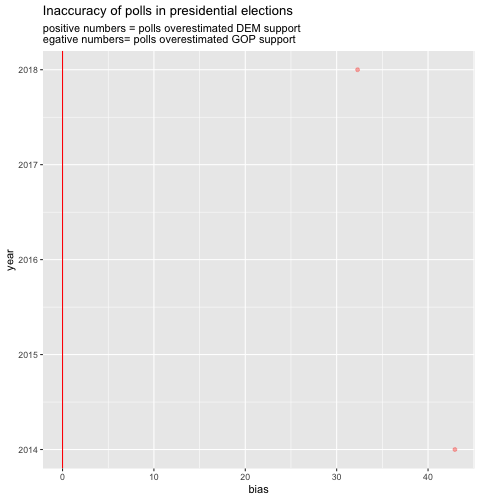

In [52]:
%%R -h 500

jayhawk_df_pres <- jayhawk_df %>% 
    filter(type_simple=='House-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(jayhawk_df_pres) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\negative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

Jayhawk Consulting only conducted 2 of the polls in the entire dataset. Both were for General House elections, in 2014 and 2018. Both were wrong and skewed Republican.

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [53]:
%%R

# make df with Fox news et al

fox_df <- df %>% filter(pollster=='Fox News/Beacon Research/Shaw & Co. Research')


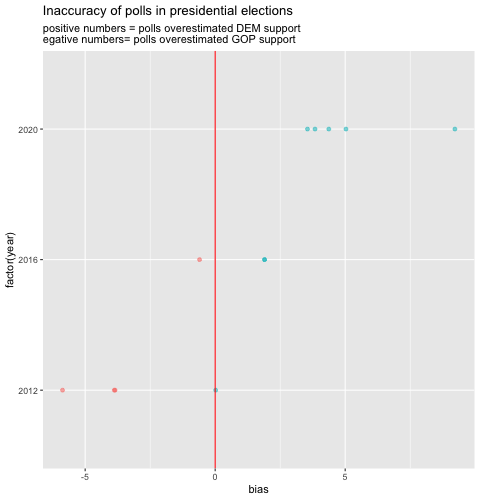

In [54]:
%%R -h 500

fox_df_pres <- fox_df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(fox_df_pres) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\negative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

In 2020 the Fox news poll skewed Democrat. It was relatively balanced in 2016.

👉 **Brown University**

In [55]:
%%R

# make df with Jawhawk 

brown_df <- df %>% filter(pollster=='Brown University')

brown_df

# A tibble: 12 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    7278      8927    7150  2000 2000… RI      Pres-P  Pres-D  Brown …      35
 2   64034    117851    7152  2000 2000… VT      Pres-P  Pres-D  Brown …      35
 3    6416      7883     845  2000 2000… RI      Pres-G  Pres-G  Brown …      35
 4    6416     27199    1707  2000 2000… RI      Sen-G   Sen-G   Brown …      35
 5   25424     88455    1409  2002 2002… RI      Gov-G   Gov-G   Brown …      35
 6   25424     30664    1675  2002 2002… RI      Sen-G   Sen-G   Brown …      35
 7   25424    117562    3067  2002 2002… RI-1    House-G House-G Brown …      35
 8    2383      2964    7404  2008 2008… RI      Pres-P  Pres-D  Brown …      35
 9   34002     41321    1239  2014 2014… RI      Gov-G   Gov-G   Brown …      35
10   34316     42010    1239  2014 2014… RI      Gov-G   Gov-G   Brown …      35
11   427

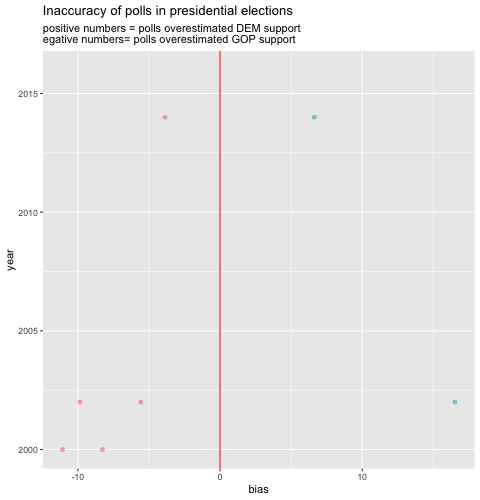

In [56]:
%%R -h 500

# brown_df_pres <- brown_df %>% 
#     filter(type_simple=='Sen-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(brown_df) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\negative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

We're not sure how to compare these because they are different types on elections.

👉 **American Research Group**

In [57]:
%%R

# make df with American Research Group 

arg_df <- df %>% filter(pollster=='American Research Group')

arg_df

# A tibble: 277 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    7384      9127    7115  2000 2000… NH      Pres-P  Pres-D  Americ…       9
 2    7384      9129    7116  2000 2000… NH      Pres-P  Pres-R  Americ…       9
 3    7357      9084    7115  2000 2000… NH      Pres-P  Pres-D  Americ…       9
 4    7357      9087    7116  2000 2000… NH      Pres-P  Pres-R  Americ…       9
 5    7345      9062    7120  2000 2000… SC      Pres-P  Pres-R  Americ…       9
 6   64009    117810    7120  2000 2000… SC      Pres-P  Pres-R  Americ…       9
 7    7299      8967    7120  2000 2000… SC      Pres-P  Pres-R  Americ…       9
 8   64022    117826    7122  2000 2000… MI      Pres-P  Pres-R  Americ…       9
 9   64027    117832    7126  2000 2000… VA      Pres-P  Pres-R  Americ…       9
10   64039    117857    7133  2000 2000… GA      Pres-P  Pres-R  Americ…       9
# … wit

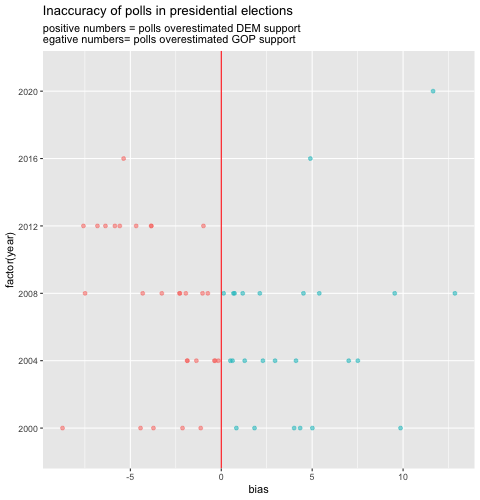

In [58]:
%%R -h 500

arg_df_pres <- arg_df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(arg_df_pres) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\negative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

The American Research Group polls have skewed Democrat in every presidential election bar 2012, when Obama was relected. 

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

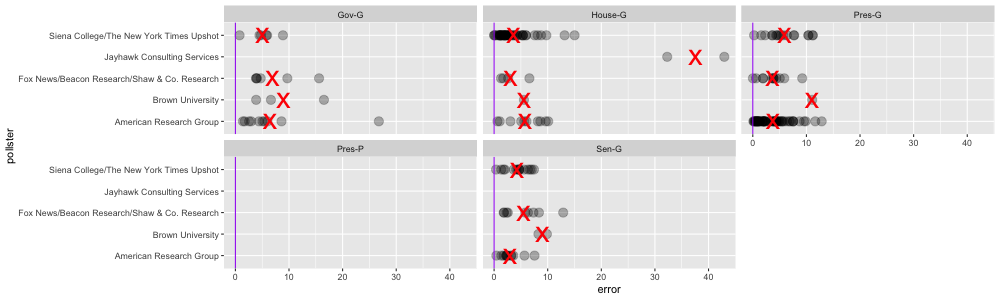

In [60]:
%%R -w 1000 -h 300 
# taking from what we looked at in class
# the idea is to create a methodlogy and explain it 

# SAME THING IN R
pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services',
                      'Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 
                      'American Research Group')

# Filter to just these pollsters
# Mutate to create a new variable (error = absolute value of bias)
pollster_df <- df %>% 
    filter(pollster %in% pollsters_i_want) %>%
    mutate(error = abs(bias))

# plot (remember, this is excluding year, that's a methodological choice...
#       and maybe not a great one)
ggplot(pollster_df) +
    aes(x=error, y=pollster) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_wrap(~type_simple)

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

In [79]:

pollster_biases = df.groupby("pollster").agg({"bias": ["mean", "median", "std", "count"]})

pollster_biases = biases[biases[('bias', 'count')] > 10]


In [80]:
biases

bias                       
                                        mean median       std count
pollster                                                           
Nielson Brothers Polling           12.262727  11.16  7.095249    11
Opinion Research Associates         7.637857   4.75  9.740234    14
Citizen Data                        7.041667   7.87  2.626850    12
PSB Research                        6.949474   7.75  6.058509    19
Montana State University Billings   6.233636   6.26  4.824467    11
...                                      ...    ...       ...   ...
OnMessage Inc.                     -5.491667  -4.04  7.447423    12
ccAdvertising                      -5.548182  -6.05  7.713925    33
TCJ Research                       -5.584194  -6.13  4.631793   124
Clout Research/Wenzel Strategies   -5.696667  -5.87  5.541937    15
MRG Research                       -7.626957  -6.38  8.344098    23

[138 rows x 4 columns]

In [89]:
pollster_biases = abs(pollster_biases)

# sort by mean bias

pollster_biases.sort_values(by=[('bias', 'mean')], ascending=False)

bias                       
                                  mean median       std count
pollster                                                     
Nielson Brothers Polling     12.262727  11.16  7.095249    11
Opinion Research Associates   7.637857   4.75  9.740234    14
MRG Research                  7.626957   6.38  8.344098    23
Citizen Data                  7.041667   7.87  2.626850    12
PSB Research                  6.949474   7.75  6.058509    19
...                                ...    ...       ...   ...
Marist College                0.131157   0.11  5.698953   121
American Research Group       0.113023   0.56  5.737122    86
CNN/Opinion Research Corp.    0.062394   0.04  5.251212    71
SurveyUSA                     0.051471   0.10  5.373156   673
St. Norbert College           0.049091   2.16  6.409242    11

[138 rows x 4 columns]

In [90]:
pollster_biases.sort_values(by=('bias', 'mean'), ascending=True)

bias                       
                                  mean median       std count
pollster                                                     
St. Norbert College           0.049091   2.16  6.409242    11
SurveyUSA                     0.051471   0.10  5.373156   673
CNN/Opinion Research Corp.    0.062394   0.04  5.251212    71
American Research Group       0.113023   0.56  5.737122    86
Marist College                0.131157   0.11  5.698953   121
...                                ...    ...       ...   ...
PSB Research                  6.949474   7.75  6.058509    19
Citizen Data                  7.041667   7.87  2.626850    12
MRG Research                  7.626957   6.38  8.344098    23
Opinion Research Associates   7.637857   4.75  9.740234    14
Nielson Brothers Polling     12.262727  11.16  7.095249    11

[138 rows x 4 columns]

To answer this question we are basing our answer on the mean bias taken across all the pollsters who conducted over 10 polls. 

St. Norbert College is the most accurate poll according to our table. That said, in close second is SurveyUSA and they have a much larger sample size (673 vs 11). 

Based on our summary statistics above, Nielson Brothers Polling is the least accurate. 

They are followed by Opinion Research Associates and MRG research.

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?



We decided to look at bias because we believe that gives us the most wholistic picture of a pollster across time. I think one also needs to try and make sure that the count is a bit higher than 10 because luck could still have a big factor. By having a bigger number of polls conducted, it also means that methodology is sound and works over contexts and different kinds of races.

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


As explained in the comments, we did a few things:
A preliminary visualisation of the data, we were able to see that Jayhawk only has two polls.
And then we got rid of pollsters that had too few polls.
After that we got the summary statistics
We normalised them
And then arranged them to look for mean bias.

👉 In bullet point form, list the **limitations** of your approach 



The limitations are mainly around the fact that one cannot account for specific contexts behind each poll. While this data does give a very broad picture, there could be numerous possibilities behind every individual result. For eg, A last minute scandal, or a complete failure to estimate what went wrong.